In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-04-04 10:13:20.630206: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 8

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 24s 774ms/step - accuracy: 0.1562 - loss: 2.1344
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1902 - loss: 2.0857 - val_accuracy: 0.3236 - val_loss: 1.9078
Epoch 2/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.2734 - loss: 1.9714
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2671 - loss: 1.9294 - val_accuracy: 0.4171 - val_loss: 1.7510
Epoch 3/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.3359 - loss: 1.7972
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3220 - loss: 1.7847 - val_accuracy: 0.4486 - val_loss: 1.5850
Epoch 4/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.3203 - loss: 1.6856
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3669 - loss: 1.6424 - val_accuracy: 0.4721 - val_loss: 1.4490
Epoch 5/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.3203 - loss: 1.6525
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3925 - loss: 1.5522 - val_accuracy: 0.5221 - val_loss: 1.3530
Epoch 6/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.3594 - loss: 1.6334
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4098 - loss: 1.4833 - val_accuracy: 0.5564 - val_loss: 1.2771
Epoch 7/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.3984 - loss: 1.4755
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4391 - loss: 1.4305 - val_accuracy: 0.5964 - val_loss: 1.2103
Epoch 8/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.3906 - loss: 1.4512
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4332 - loss: 1.3960 - val_accuracy: 0.6379 - val_loss: 1.1400
Epoch 9/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.4453 - loss: 1.3035
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4791 - loss: 1.3081 - val_accuracy: 0.6436 - val_loss: 1.0848
Epoch 10/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.5000 - loss: 1.2550
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4911 - loss: 1.2662 - val_accuracy: 0.6557 - val_loss: 1.0347
Epoch 11/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.4922 - loss: 1.2546
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4972 - loss: 1.2442 - val_accuracy: 0.6950 - val_loss: 0.9701
Epoch 12/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.4844 - loss: 1.1589
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5208 - loss: 1.1888 - val_accuracy: 0.7464 - val_loss: 0.9191
Epoch 13/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.4453 - loss: 1.3872
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5242 - loss: 1.2074 - val_accuracy: 0.7657 - val_loss: 0.8635
Epoch 14/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6094 - loss: 1.0515
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5601 - loss: 1.1309 - val_accuracy: 0.7764 - val_loss: 0.8212
Epoch 15/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.4297 - loss: 1.2307
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5561 - loss: 1.1180 - val_accuracy: 0.7900 - val_loss: 0.7879
Epoch 16/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.5938 - loss: 1.1199
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5930 - loss: 1.0706 - val_accuracy: 0.8014 - val_loss: 0.7482
Epoch 17/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.5703 - loss: 1.0058
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5992 - loss: 1.0439 - val_accuracy: 0.7921 - val_loss: 0.7181
Epoch 18/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6406 - loss: 0.9573
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5916 - loss: 1.0283 - val_accuracy: 0.8079 - val_loss: 0.6845
Epoch 19/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.5938 - loss: 1.0153
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6080 - loss: 0.9978 - val_accuracy: 0.8186 - val_loss: 0.6573
Epoch 20/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6172 - loss: 0.9632
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6131 - loss: 0.9892 - val_accuracy: 0.8314 - val_loss: 0.6337
Epoch 21/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.5547 - loss: 1.0358
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6065 - loss: 0.9963 - val_accuracy: 0.8479 - val_loss: 0.6141
Epoch 22/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6172 - loss: 1.0449
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6223 - loss: 0.9798 - val_accuracy: 0.8493 - val_loss: 0.6004
Epoch 23/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6641 - loss: 0.9863
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6370 - loss: 0.9434 - val_accuracy: 0.8671 - val_loss: 0.5802
Epoch 24/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6016 - loss: 1.0588
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6416 - loss: 0.9543 - val_accuracy: 0.8771 - val_loss: 0.5656
Epoch 25/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6250 - loss: 0.9092
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6395 - loss: 0.9294 - val_accuracy: 0.8707 - val_loss: 0.5512
Epoch 26/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6250 - loss: 0.8911
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6511 - loss: 0.9104 - val_accuracy: 0.8829 - val_loss: 0.5392
Epoch 27/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6641 - loss: 0.9013
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6535 - loss: 0.9104 - val_accuracy: 0.8843 - val_loss: 0.5293
Epoch 28/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.5625 - loss: 1.0066
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6451 - loss: 0.9073 - val_accuracy: 0.8929 - val_loss: 0.5252
Epoch 29/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6875 - loss: 0.7839
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6593 - loss: 0.8706 - val_accuracy: 0.8793 - val_loss: 0.5133
Epoch 30/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6641 - loss: 0.8382
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6686 - loss: 0.8731 - val_accuracy: 0.8971 - val_loss: 0.5029
Epoch 31/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7266 - loss: 0.7966
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6782 - loss: 0.8601 - val_accuracy: 0.9043 - val_loss: 0.4950
Epoch 32/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6875 - loss: 0.8739
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6787 - loss: 0.8601 - val_accuracy: 0.9057 - val_loss: 0.4835
Epoch 33/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7109 - loss: 0.7627
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6882 - loss: 0.8229 - val_accuracy: 0.9107 - val_loss: 0.4718
Epoch 34/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6875 - loss: 0.8011
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6801 - loss: 0.8549 - val_accuracy: 0.9086 - val_loss: 0.4712
Epoch 35/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6719 - loss: 0.8450
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6833 - loss: 0.8440 - val_accuracy: 0.9071 - val_loss: 0.4668
Epoch 36/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7656 - loss: 0.6827
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6927 - loss: 0.8265 - val_accuracy: 0.9057 - val_loss: 0.4608
Epoch 37/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6641 - loss: 0.9000
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6824 - loss: 0.8475 - val_accuracy: 0.9143 - val_loss: 0.4602
Epoch 38/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7500 - loss: 0.8060
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6948 - loss: 0.8371 - val_accuracy: 0.9150 - val_loss: 0.4519
Epoch 39/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7031 - loss: 0.7591
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7005 - loss: 0.8170 - val_accuracy: 0.9143 - val_loss: 0.4457
Epoch 40/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7266 - loss: 0.7801
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6874 - loss: 0.8269 - val_accuracy: 0.9150 - val_loss: 0.4360
Epoch 41/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7344 - loss: 0.7457
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7009 - loss: 0.8008 - val_accuracy: 0.9100 - val_loss: 0.4386
Epoch 42/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6172 - loss: 0.8861
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6929 - loss: 0.8256 - val_accuracy: 0.9143 - val_loss: 0.4352
Epoch 43/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6328 - loss: 0.8617
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7001 - loss: 0.7985 - val_accuracy: 0.9143 - val_loss: 0.4218
Epoch 44/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6797 - loss: 0.7479
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6993 - loss: 0.7800 - val_accuracy: 0.9164 - val_loss: 0.4194
Epoch 45/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7422 - loss: 0.7174
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7071 - loss: 0.7833 - val_accuracy: 0.9143 - val_loss: 0.4142
Epoch 46/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6562 - loss: 0.8995
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6915 - loss: 0.8116 - val_accuracy: 0.9136 - val_loss: 0.4161
Epoch 47/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7578 - loss: 0.7064
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7179 - loss: 0.7537 - val_accuracy: 0.9179 - val_loss: 0.4036
Epoch 48/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6875 - loss: 0.8525
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7117 - loss: 0.7816 - val_accuracy: 0.9171 - val_loss: 0.4101
Epoch 49/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7734 - loss: 0.6701
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7139 - loss: 0.7642 - val_accuracy: 0.9093 - val_loss: 0.4023
Epoch 50/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7578 - loss: 0.6964
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7192 - loss: 0.7570 - val_accuracy: 0.9179 - val_loss: 0.3999
Epoch 51/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6094 - loss: 0.8651
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6925 - loss: 0.7965 - val_accuracy: 0.9136 - val_loss: 0.4027
Epoch 52/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7109 - loss: 0.7299
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7139 - loss: 0.7573 - val_accuracy: 0.9164 - val_loss: 0.3970
Epoch 53/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7188 - loss: 0.7368
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7192 - loss: 0.7547 - val_accuracy: 0.9164 - val_loss: 0.3884
Epoch 54/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6875 - loss: 0.8196
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7146 - loss: 0.7516 - val_accuracy: 0.9164 - val_loss: 0.3879
Epoch 55/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7031 - loss: 0.7790
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7104 - loss: 0.7684 - val_accuracy: 0.9143 - val_loss: 0.3863
Epoch 56/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7031 - loss: 0.7093
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7141 - loss: 0.7515 - val_accuracy: 0.9150 - val_loss: 0.3796
Epoch 57/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6875 - loss: 0.8466
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7127 - loss: 0.7799 - val_accuracy: 0.9271 - val_loss: 0.3772
Epoch 58/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7500 - loss: 0.6688
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7178 - loss: 0.7539 - val_accuracy: 0.9164 - val_loss: 0.3828
Epoch 59/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6875 - loss: 0.8058
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7093 - loss: 0.7627 - val_accuracy: 0.9164 - val_loss: 0.3716
Epoch 60/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6875 - loss: 0.7770
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7091 - loss: 0.7443 - val_accuracy: 0.9164 - val_loss: 0.3684
Epoch 61/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7188 - loss: 0.7576
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7042 - loss: 0.7684 - val_accuracy: 0.9179 - val_loss: 0.3688
Epoch 62/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6797 - loss: 0.8669
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7085 - loss: 0.7640 - val_accuracy: 0.9164 - val_loss: 0.3718
Epoch 63/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7188 - loss: 0.7961
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7177 - loss: 0.7564 - val_accuracy: 0.9193 - val_loss: 0.3720
Epoch 64/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.6562 - loss: 0.9045
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7125 - loss: 0.7687 - val_accuracy: 0.9193 - val_loss: 0.3648
Epoch 65/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7578 - loss: 0.7231
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7315 - loss: 0.7239 - val_accuracy: 0.9229 - val_loss: 0.3604
Epoch 66/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7656 - loss: 0.6627
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7252 - loss: 0.7407 - val_accuracy: 0.9193 - val_loss: 0.3565
Epoch 67/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7031 - loss: 0.7706
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7057 - loss: 0.7493 - val_accuracy: 0.9214 - val_loss: 0.3553
Epoch 68/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7422 - loss: 0.6581
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7257 - loss: 0.7322 - val_accuracy: 0.9221 - val_loss: 0.3499
Epoch 69/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7578 - loss: 0.7823
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7319 - loss: 0.7263 - val_accuracy: 0.9214 - val_loss: 0.3523
Epoch 70/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7188 - loss: 0.8322
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7235 - loss: 0.7298 - val_accuracy: 0.9179 - val_loss: 0.3497
Epoch 71/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7891 - loss: 0.7298
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7305 - loss: 0.7150 - val_accuracy: 0.9236 - val_loss: 0.3453
Epoch 72/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6875 - loss: 0.8163
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.7390 - val_accuracy: 0.9229 - val_loss: 0.3447
Epoch 73/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7266 - loss: 0.7507
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7316 - loss: 0.7061 - val_accuracy: 0.9236 - val_loss: 0.3389
Epoch 74/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7188 - loss: 0.8419
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7392 - loss: 0.7172 - val_accuracy: 0.9207 - val_loss: 0.3410
Epoch 75/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6641 - loss: 0.7775
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7137 - loss: 0.7540 - val_accuracy: 0.9257 - val_loss: 0.3413
Epoch 76/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.7422 - loss: 0.7307
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7401 - loss: 0.7264 - val_accuracy: 0.9243 - val_loss: 0.3363
Epoch 77/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6875 - loss: 0.7558
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7134 - loss: 0.7265 - val_accuracy: 0.9200 - val_loss: 0.3479
Epoch 78/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7344 - loss: 0.7565
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7336 - loss: 0.7217 - val_accuracy: 0.9286 - val_loss: 0.3324
Epoch 79/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7578 - loss: 0.7321
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7371 - loss: 0.7096 - val_accuracy: 0.9343 - val_loss: 0.3396
Epoch 80/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7656 - loss: 0.6736
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7354 - loss: 0.7060 - val_accuracy: 0.9221 - val_loss: 0.3394
Epoch 81/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7578 - loss: 0.6902
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7458 - loss: 0.6894 - val_accuracy: 0.9393 - val_loss: 0.3244
Epoch 82/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7344 - loss: 0.7469
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7248 - loss: 0.7278 - val_accuracy: 0.9393 - val_loss: 0.3307
Epoch 83/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6719 - loss: 0.8056
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7415 - loss: 0.7074 - val_accuracy: 0.9386 - val_loss: 0.3276
Epoch 84/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7031 - loss: 0.7715
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7305 - loss: 0.7198 - val_accuracy: 0.9307 - val_loss: 0.3313
Epoch 85/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7422 - loss: 0.7592
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7373 - loss: 0.7040 - val_accuracy: 0.9343 - val_loss: 0.3237
Epoch 86/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7109 - loss: 0.7303
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7335 - loss: 0.7081 - val_accuracy: 0.9264 - val_loss: 0.3295
Epoch 87/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8047 - loss: 0.5687
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7310 - loss: 0.7201 - val_accuracy: 0.9286 - val_loss: 0.3300
Epoch 88/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7734 - loss: 0.6314
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7440 - loss: 0.6976 - val_accuracy: 0.9329 - val_loss: 0.3282
Epoch 89/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7734 - loss: 0.6936
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7554 - loss: 0.7002 - val_accuracy: 0.9293 - val_loss: 0.3305
Epoch 90/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7500 - loss: 0.6645
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7468 - loss: 0.6973 - val_accuracy: 0.9286 - val_loss: 0.3347
Epoch 91/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7734 - loss: 0.5711
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7533 - loss: 0.6413 - val_accuracy: 0.9393 - val_loss: 0.3200
Epoch 92/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.7422 - loss: 0.6921
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7405 - loss: 0.6833 - val_accuracy: 0.9350 - val_loss: 0.3200
Epoch 93/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7422 - loss: 0.6354
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7358 - loss: 0.6898 - val_accuracy: 0.9307 - val_loss: 0.3224
Epoch 94/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7031 - loss: 0.7691
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7387 - loss: 0.7067 - val_accuracy: 0.9314 - val_loss: 0.3199
Epoch 95/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7109 - loss: 0.7333
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7383 - loss: 0.6850 - val_accuracy: 0.9414 - val_loss: 0.3072
Epoch 96/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7422 - loss: 0.6867
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7322 - loss: 0.7089 - val_accuracy: 0.9421 - val_loss: 0.3116
Epoch 97/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7812 - loss: 0.6090
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7494 - loss: 0.6857 - val_accuracy: 0.9379 - val_loss: 0.3056
Epoch 98/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7812 - loss: 0.6082
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7626 - loss: 0.6473 - val_accuracy: 0.9414 - val_loss: 0.3067
Epoch 99/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6953 - loss: 0.7515
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7379 - loss: 0.6937 - val_accuracy: 0.9379 - val_loss: 0.3151
Epoch 100/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6953 - loss: 0.7246
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7363 - loss: 0.7115 - val_accuracy: 0.9314 - val_loss: 0.3190
Epoch 101/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7109 - loss: 0.7339
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7564 - loss: 0.6782 - val_accuracy: 0.9350 - val_loss: 0.3140
Epoch 102/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7578 - loss: 0.6662
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7547 - loss: 0.6610 - val_accuracy: 0.9350 - val_loss: 0.3076
Epoch 103/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7734 - loss: 0.6087
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7560 - loss: 0.6623 - val_accuracy: 0.9371 - val_loss: 0.3079
Epoch 104/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7656 - loss: 0.7186
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7539 - loss: 0.6939 - val_accuracy: 0.9343 - val_loss: 0.3177
Epoch 105/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7266 - loss: 0.6646
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7502 - loss: 0.6567 - val_accuracy: 0.9207 - val_loss: 0.3226
Epoch 106/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7031 - loss: 0.7319
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7445 - loss: 0.6776 - val_accuracy: 0.9400 - val_loss: 0.3062
Epoch 107/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7500 - loss: 0.7295
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7477 - loss: 0.6746 - val_accuracy: 0.9393 - val_loss: 0.3050
Epoch 108/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7734 - loss: 0.6268
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7377 - loss: 0.6888 - val_accuracy: 0.9407 - val_loss: 0.3096
Epoch 109/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7500 - loss: 0.6259
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7561 - loss: 0.6547 - val_accuracy: 0.9379 - val_loss: 0.3091
Epoch 110/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8047 - loss: 0.6222
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7561 - loss: 0.6732 - val_accuracy: 0.9350 - val_loss: 0.3161
Epoch 111/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.8125 - loss: 0.5849
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7536 - loss: 0.6656 - val_accuracy: 0.9436 - val_loss: 0.3094
Epoch 112/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7422 - loss: 0.6928
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7469 - loss: 0.6785 - val_accuracy: 0.9464 - val_loss: 0.3037
Epoch 113/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.8281 - loss: 0.4896
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7743 - loss: 0.6015 - val_accuracy: 0.9386 - val_loss: 0.3020
Epoch 114/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7578 - loss: 0.6653
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7558 - loss: 0.6676 - val_accuracy: 0.9493 - val_loss: 0.3053
Epoch 115/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7422 - loss: 0.6919
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7487 - loss: 0.6730 - val_accuracy: 0.9350 - val_loss: 0.3082
Epoch 116/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7266 - loss: 0.7247
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7569 - loss: 0.6693 - val_accuracy: 0.9457 - val_loss: 0.2967
Epoch 117/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7578 - loss: 0.7274
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7558 - loss: 0.6765 - val_accuracy: 0.9379 - val_loss: 0.2996
Epoch 118/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7109 - loss: 0.8107
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7530 - loss: 0.6671 - val_accuracy: 0.9507 - val_loss: 0.2961
Epoch 119/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7656 - loss: 0.6534
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7584 - loss: 0.6544 - val_accuracy: 0.9386 - val_loss: 0.3157
Epoch 120/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7344 - loss: 0.6595
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7578 - loss: 0.6311 - val_accuracy: 0.9429 - val_loss: 0.2970
Epoch 121/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7109 - loss: 0.7294
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7480 - loss: 0.6578 - val_accuracy: 0.9393 - val_loss: 0.3047
Epoch 122/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8438 - loss: 0.4686
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7758 - loss: 0.6270 - val_accuracy: 0.9507 - val_loss: 0.3046
Epoch 123/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7344 - loss: 0.6976
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7477 - loss: 0.6768 - val_accuracy: 0.9400 - val_loss: 0.3113
Epoch 124/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7422 - loss: 0.8168
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7550 - loss: 0.6759 - val_accuracy: 0.9421 - val_loss: 0.3212
Epoch 125/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7422 - loss: 0.7502
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7609 - loss: 0.6597 - val_accuracy: 0.9471 - val_loss: 0.3051
Epoch 126/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.8047 - loss: 0.5860
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7673 - loss: 0.6622 - val_accuracy: 0.9414 - val_loss: 0.3093
Epoch 127/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7734 - loss: 0.6501
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7547 - loss: 0.6531 - val_accuracy: 0.9457 - val_loss: 0.3032
Epoch 128/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8516 - loss: 0.5020
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7661 - loss: 0.6263 - val_accuracy: 0.9386 - val_loss: 0.3116
Epoch 129/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7578 - loss: 0.5979
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7640 - loss: 0.6289 - val_accuracy: 0.9436 - val_loss: 0.2998
Epoch 130/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7812 - loss: 0.6039
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7651 - loss: 0.6432 - val_accuracy: 0.9500 - val_loss: 0.2980
Epoch 131/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7969 - loss: 0.6071
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7560 - loss: 0.6685 - val_accuracy: 0.9493 - val_loss: 0.2972
Epoch 132/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7031 - loss: 0.6888
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7504 - loss: 0.6517 - val_accuracy: 0.9414 - val_loss: 0.2988
Epoch 133/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7656 - loss: 0.6590
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7674 - loss: 0.6435 - val_accuracy: 0.9557 - val_loss: 0.2953
Epoch 134/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7500 - loss: 0.6610
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7690 - loss: 0.6222 - val_accuracy: 0.9471 - val_loss: 0.3040
Epoch 135/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8359 - loss: 0.5065
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7716 - loss: 0.6377 - val_accuracy: 0.9371 - val_loss: 0.3021
Epoch 136/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.8047 - loss: 0.5381
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7621 - loss: 0.6585 - val_accuracy: 0.9443 - val_loss: 0.3091
Epoch 137/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6875 - loss: 0.7343
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7691 - loss: 0.6252 - val_accuracy: 0.9421 - val_loss: 0.2972
Epoch 138/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7812 - loss: 0.6503
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7766 - loss: 0.6203 - val_accuracy: 0.9400 - val_loss: 0.3062
Epoch 139/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7969 - loss: 0.5986
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7652 - loss: 0.6451 - val_accuracy: 0.9429 - val_loss: 0.3070
Epoch 140/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7344 - loss: 0.7311
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7626 - loss: 0.6560 - val_accuracy: 0.9386 - val_loss: 0.3052
Epoch 141/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7266 - loss: 0.6985
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7670 - loss: 0.6259 - val_accuracy: 0.9436 - val_loss: 0.3041
Epoch 142/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8125 - loss: 0.5803
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7756 - loss: 0.6100 - val_accuracy: 0.9414 - val_loss: 0.3013
Epoch 143/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8125 - loss: 0.5068
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7717 - loss: 0.6222 - val_accuracy: 0.9400 - val_loss: 0.3019
Epoch 144/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7422 - loss: 0.5902
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7456 - loss: 0.6619 - val_accuracy: 0.9429 - val_loss: 0.3092
Epoch 145/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7266 - loss: 0.7048
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7676 - loss: 0.6289 - val_accuracy: 0.9493 - val_loss: 0.2930
Epoch 146/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7969 - loss: 0.5916
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7874 - loss: 0.6009 - val_accuracy: 0.9407 - val_loss: 0.3001
Epoch 147/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7969 - loss: 0.5338
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7653 - loss: 0.6398 - val_accuracy: 0.9479 - val_loss: 0.3013
Epoch 148/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7344 - loss: 0.6826
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7550 - loss: 0.6569 - val_accuracy: 0.9329 - val_loss: 0.3075
Epoch 149/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.8203 - loss: 0.5557
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7752 - loss: 0.6355 - val_accuracy: 0.9436 - val_loss: 0.2984
Epoch 150/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7734 - loss: 0.6053
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7774 - loss: 0.6145 - val_accuracy: 0.9429 - val_loss: 0.3041
Epoch 151/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7969 - loss: 0.5284
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7681 - loss: 0.6255 - val_accuracy: 0.9379 - val_loss: 0.3048
Epoch 152/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7109 - loss: 0.7367
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7553 - loss: 0.6410 - val_accuracy: 0.9436 - val_loss: 0.2998
Epoch 153/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7188 - loss: 0.6847
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7565 - loss: 0.6435 - val_accuracy: 0.9329 - val_loss: 0.3013
Epoch 154/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7578 - loss: 0.6019
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7606 - loss: 0.6445 - val_accuracy: 0.9464 - val_loss: 0.3086
Epoch 155/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7266 - loss: 0.6905
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7829 - loss: 0.5952 - val_accuracy: 0.9436 - val_loss: 0.3013
Epoch 156/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7969 - loss: 0.5827
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7733 - loss: 0.6101 - val_accuracy: 0.9507 - val_loss: 0.2988
Epoch 157/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7891 - loss: 0.5812
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7816 - loss: 0.6052 - val_accuracy: 0.9400 - val_loss: 0.2926
Epoch 158/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7656 - loss: 0.6100
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7721 - loss: 0.6340 - val_accuracy: 0.9507 - val_loss: 0.2885
Epoch 159/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7812 - loss: 0.6095
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7736 - loss: 0.6298 - val_accuracy: 0.9414 - val_loss: 0.2975
Epoch 160/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7969 - loss: 0.5565
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7647 - loss: 0.6332 - val_accuracy: 0.9379 - val_loss: 0.2923
Epoch 161/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7656 - loss: 0.5624
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7589 - loss: 0.6276 - val_accuracy: 0.9471 - val_loss: 0.2910
Epoch 162/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8125 - loss: 0.5806
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7728 - loss: 0.6356 - val_accuracy: 0.9479 - val_loss: 0.2907
Epoch 163/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7500 - loss: 0.6604
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7768 - loss: 0.6096 - val_accuracy: 0.9457 - val_loss: 0.2965
Epoch 164/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7500 - loss: 0.6000
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7751 - loss: 0.6176 - val_accuracy: 0.9400 - val_loss: 0.2921
Epoch 165/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8203 - loss: 0.5449
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7796 - loss: 0.6106 - val_accuracy: 0.9443 - val_loss: 0.2894
Epoch 166/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7500 - loss: 0.6596
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7755 - loss: 0.6121 - val_accuracy: 0.9500 - val_loss: 0.2853
Epoch 167/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7891 - loss: 0.6091
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7778 - loss: 0.6174 - val_accuracy: 0.9407 - val_loss: 0.2930
Epoch 168/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7344 - loss: 0.6132
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7638 - loss: 0.6141 - val_accuracy: 0.9443 - val_loss: 0.2906
Epoch 169/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7344 - loss: 0.6220
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7618 - loss: 0.6249 - val_accuracy: 0.9443 - val_loss: 0.2946
Epoch 170/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7891 - loss: 0.6172
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7669 - loss: 0.6313 - val_accuracy: 0.9486 - val_loss: 0.2897
Epoch 171/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7422 - loss: 0.7233
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7760 - loss: 0.6171 - val_accuracy: 0.9429 - val_loss: 0.2901
Epoch 172/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7812 - loss: 0.5353
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7700 - loss: 0.6324 - val_accuracy: 0.9407 - val_loss: 0.2856
Epoch 173/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7656 - loss: 0.6373
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7709 - loss: 0.6018 - val_accuracy: 0.9250 - val_loss: 0.2957
Epoch 174/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7422 - loss: 0.7823
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7745 - loss: 0.6365 - val_accuracy: 0.9314 - val_loss: 0.2983
Epoch 175/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8047 - loss: 0.5476
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7832 - loss: 0.5964 - val_accuracy: 0.9386 - val_loss: 0.2948
Epoch 176/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.8203 - loss: 0.5031
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7876 - loss: 0.5883 - val_accuracy: 0.9414 - val_loss: 0.2917
Epoch 177/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7812 - loss: 0.6260
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7776 - loss: 0.6261 - val_accuracy: 0.9393 - val_loss: 0.2986
Epoch 178/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7812 - loss: 0.5824
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7750 - loss: 0.6053 - val_accuracy: 0.9379 - val_loss: 0.3028
Epoch 179/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7891 - loss: 0.6161
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7687 - loss: 0.6334 - val_accuracy: 0.9357 - val_loss: 0.2960
Epoch 180/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7031 - loss: 0.8338
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7672 - loss: 0.6382 - val_accuracy: 0.9243 - val_loss: 0.2971
Epoch 181/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8125 - loss: 0.5644
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7786 - loss: 0.6207 - val_accuracy: 0.9386 - val_loss: 0.2893
Epoch 182/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7422 - loss: 0.6898
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7797 - loss: 0.6133 - val_accuracy: 0.9343 - val_loss: 0.2973
Epoch 183/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.8203 - loss: 0.5571
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7711 - loss: 0.6240 - val_accuracy: 0.9400 - val_loss: 0.2919
Epoch 184/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8281 - loss: 0.5421
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7964 - loss: 0.5872 - val_accuracy: 0.9421 - val_loss: 0.2889
Epoch 185/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7188 - loss: 0.6327
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7629 - loss: 0.6443 - val_accuracy: 0.9514 - val_loss: 0.2811
Epoch 186/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7578 - loss: 0.6325
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7706 - loss: 0.6281 - val_accuracy: 0.9471 - val_loss: 0.2853
Epoch 187/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7734 - loss: 0.6399
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7830 - loss: 0.5970 - val_accuracy: 0.9421 - val_loss: 0.2923
Epoch 188/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7969 - loss: 0.5600
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7775 - loss: 0.6107 - val_accuracy: 0.9500 - val_loss: 0.2768
Epoch 189/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7891 - loss: 0.5508
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7757 - loss: 0.6143 - val_accuracy: 0.9486 - val_loss: 0.2829
Epoch 190/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7734 - loss: 0.6468
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7802 - loss: 0.5995 - val_accuracy: 0.9257 - val_loss: 0.2874
Epoch 191/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8047 - loss: 0.6305
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7732 - loss: 0.6349 - val_accuracy: 0.9464 - val_loss: 0.2920
Epoch 192/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7969 - loss: 0.5259
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7719 - loss: 0.6131 - val_accuracy: 0.9357 - val_loss: 0.2973
Epoch 193/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.8125 - loss: 0.5279
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7857 - loss: 0.6112 - val_accuracy: 0.9421 - val_loss: 0.2960
Epoch 194/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7344 - loss: 0.6314
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7680 - loss: 0.6067 - val_accuracy: 0.9479 - val_loss: 0.2890
Epoch 195/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7188 - loss: 0.7200
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7624 - loss: 0.6234 - val_accuracy: 0.9400 - val_loss: 0.2895
Epoch 196/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7812 - loss: 0.5523
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7735 - loss: 0.5949 - val_accuracy: 0.9464 - val_loss: 0.2867
Epoch 197/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7656 - loss: 0.6314
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7852 - loss: 0.6055 - val_accuracy: 0.9364 - val_loss: 0.2866
Epoch 198/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7422 - loss: 0.7399
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7622 - loss: 0.6289 - val_accuracy: 0.9471 - val_loss: 0.2838
Epoch 199/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7734 - loss: 0.5504
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7847 - loss: 0.6087 - val_accuracy: 0.9343 - val_loss: 0.2994
Epoch 200/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8281 - loss: 0.4598
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7763 - loss: 0.5909 - val_accuracy: 0.9450 - val_loss: 0.2834
Epoch 201/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8359 - loss: 0.4848
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7845 - loss: 0.6186 - val_accuracy: 0.9407 - val_loss: 0.2842
Epoch 202/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7422 - loss: 0.6542
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7753 - loss: 0.6074 - val_accuracy: 0.9536 - val_loss: 0.2740
Epoch 203/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8281 - loss: 0.5033
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7922 - loss: 0.5746 - val_accuracy: 0.9429 - val_loss: 0.2825
Epoch 204/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.8047 - loss: 0.5097
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7756 - loss: 0.6266 - val_accuracy: 0.9393 - val_loss: 0.2868
Epoch 205/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7266 - loss: 0.6552
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7738 - loss: 0.6037 - val_accuracy: 0.9400 - val_loss: 0.2911
Epoch 206/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7812 - loss: 0.6825
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7778 - loss: 0.6041 - val_accuracy: 0.9336 - val_loss: 0.2979
Epoch 207/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8125 - loss: 0.5212
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7683 - loss: 0.6198 - val_accuracy: 0.9307 - val_loss: 0.3035
Epoch 208/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7891 - loss: 0.5890
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7642 - loss: 0.6178 - val_accuracy: 0.9414 - val_loss: 0.2959
Epoch 209/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7500 - loss: 0.7119
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7595 - loss: 0.6383 - val_accuracy: 0.9414 - val_loss: 0.2917
Epoch 210/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7734 - loss: 0.6226
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7781 - loss: 0.6168 - val_accuracy: 0.9307 - val_loss: 0.3047
Epoch 211/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.8203 - loss: 0.4850
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7850 - loss: 0.5954 - val_accuracy: 0.9379 - val_loss: 0.2936
Epoch 212/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6953 - loss: 0.7542
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7595 - loss: 0.6467 - val_accuracy: 0.9421 - val_loss: 0.2938
Epoch 213/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7891 - loss: 0.5805
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7670 - loss: 0.6302 - val_accuracy: 0.9371 - val_loss: 0.2904
Epoch 214/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7891 - loss: 0.5604
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7827 - loss: 0.5886 - val_accuracy: 0.9271 - val_loss: 0.3023
Epoch 215/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7734 - loss: 0.6162
Epoch 215: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7890 - loss: 0.5804 - val_accuracy: 0.9350 - val_loss: 0.2934
Epoch 216/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7500 - loss: 0.6320
Epoch 216: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7760 - loss: 0.6172 - val_accuracy: 0.9450 - val_loss: 0.2846
Epoch 217/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7969 - loss: 0.4845
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7839 - loss: 0.5942 - val_accuracy: 0.9429 - val_loss: 0.2868
Epoch 218/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7656 - loss: 0.5935
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7730 - loss: 0.5899 - val_accuracy: 0.9236 - val_loss: 0.2994
Epoch 219/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7734 - loss: 0.6382
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7864 - loss: 0.5944 - val_accuracy: 0.9300 - val_loss: 0.2883
Epoch 220/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7266 - loss: 0.6796
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7771 - loss: 0.6056 - val_accuracy: 0.9364 - val_loss: 0.2902
Epoch 221/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6953 - loss: 0.6741
Epoch 221: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7682 - loss: 0.6183 - val_accuracy: 0.9386 - val_loss: 0.2863
Epoch 222/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.8047 - loss: 0.5716
Epoch 222: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7899 - loss: 0.5877 - val_accuracy: 0.9550 - val_loss: 0.2725
Epoch 223/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7891 - loss: 0.5945
Epoch 223: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7756 - loss: 0.6180 - val_accuracy: 0.9364 - val_loss: 0.2885
Epoch 224/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7734 - loss: 0.6716
Epoch 224: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7739 - loss: 0.6209 - val_accuracy: 0.9364 - val_loss: 0.2908
Epoch 225/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7266 - loss: 0.6567
Epoch 225: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7806 - loss: 0.5981 - val_accuracy: 0.9364 - val_loss: 0.2841
Epoch 226/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8516 - loss: 0.5691
Epoch 226: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7836 - loss: 0.6028 - val_accuracy: 0.9371 - val_loss: 0.2965
Epoch 227/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7109 - loss: 0.7716
Epoch 227: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7659 - loss: 0.6174 - val_accuracy: 0.9436 - val_loss: 0.2799
Epoch 228/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7969 - loss: 0.5658
Epoch 228: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7883 - loss: 0.6011 - val_accuracy: 0.9350 - val_loss: 0.2912
Epoch 229/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.7578 - loss: 0.5417
Epoch 229: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7826 - loss: 0.5890 - val_accuracy: 0.9343 - val_loss: 0.2967
Epoch 230/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7969 - loss: 0.6100
Epoch 230: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7918 - loss: 0.5779 - val_accuracy: 0.9307 - val_loss: 0.2931
Epoch 231/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7344 - loss: 0.6328
Epoch 231: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7733 - loss: 0.5967 - val_accuracy: 0.9443 - val_loss: 0.2814
Epoch 232/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7812 - loss: 0.5999
Epoch 232: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7900 - loss: 0.5982 - val_accuracy: 0.9400 - val_loss: 0.2803
Epoch 233/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7266 - loss: 0.6737
Epoch 233: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7630 - loss: 0.6181 - val_accuracy: 0.9264 - val_loss: 0.3020
Epoch 234/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8438 - loss: 0.4963
Epoch 234: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8068 - loss: 0.5623 - val_accuracy: 0.9350 - val_loss: 0.2923
Epoch 235/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7969 - loss: 0.5850
Epoch 235: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7898 - loss: 0.5917 - val_accuracy: 0.9379 - val_loss: 0.3014
Epoch 236/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7969 - loss: 0.5561
Epoch 236: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7812 - loss: 0.5973 - val_accuracy: 0.9293 - val_loss: 0.2915
Epoch 237/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8125 - loss: 0.6096
Epoch 237: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7760 - loss: 0.6183 - val_accuracy: 0.9357 - val_loss: 0.2975
Epoch 238/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7188 - loss: 0.7499
Epoch 238: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7885 - loss: 0.5950 - val_accuracy: 0.9171 - val_loss: 0.2972
Epoch 239/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8125 - loss: 0.5512
Epoch 239: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7821 - loss: 0.6067 - val_accuracy: 0.9407 - val_loss: 0.2799
Epoch 240/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7578 - loss: 0.6401
Epoch 240: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7752 - loss: 0.6133 - val_accuracy: 0.9450 - val_loss: 0.2798
Epoch 241/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7891 - loss: 0.5762
Epoch 241: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7864 - loss: 0.5796 - val_accuracy: 0.9393 - val_loss: 0.2830
Epoch 242/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7266 - loss: 0.8137
Epoch 242: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7817 - loss: 0.6241 - val_accuracy: 0.9171 - val_loss: 0.3015
Epoch 242: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9206 - loss: 0.2946 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
[2.02042069e-02 1.03406474e-01 8.75930190e-01 9.52351286e-07
 5.87979905e-08 5.32876584e-06 3.76829877e-04 7.60245093e-05]
2


# Confusion matrix

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


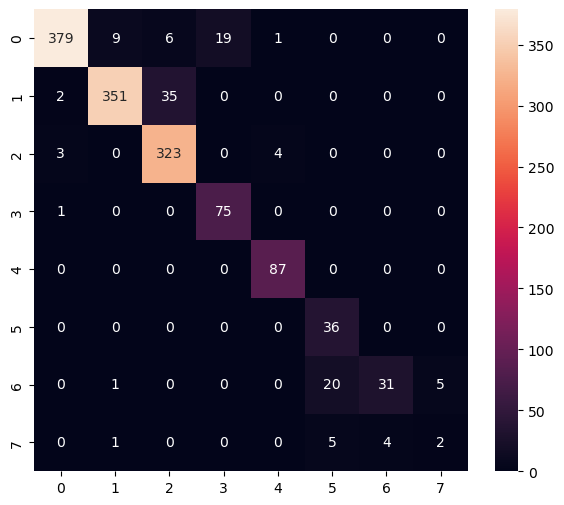

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       414
           1       0.97      0.90      0.94       388
           2       0.89      0.98      0.93       330
           3       0.80      0.99      0.88        76
           4       0.95      1.00      0.97        87
           5       0.59      1.00      0.74        36
           6       0.89      0.54      0.67        57
           7       0.29      0.17      0.21        12

    accuracy                           0.92      1400
   macro avg       0.79      0.81      0.79      1400
weighted avg       0.92      0.92      0.92      1400



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp9nxfzn6a/assets


INFO:tensorflow:Assets written to: /tmp/tmp9nxfzn6a/assets


Saved artifact at '/tmp/tmp9nxfzn6a'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  140229042898704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140229042900432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140229042899472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140229042902352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140229042902160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140229042903120: TensorSpec(shape=(), dtype=tf.resource, name=None)


2025-04-04 10:14:53.083427: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp9nxfzn6a
2025-04-04 10:14:53.084010: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-04 10:14:53.084020: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp9nxfzn6a
2025-04-04 10:14:53.120989: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-04 10:14:53.141272: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp9nxfzn6a
2025-04-04 10:14:53.147623: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 64197 microseconds.
2025-04-04 10:14:53.156611: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


6732

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 82 μs, sys: 82 μs, total: 164 μs
Wall time: 174 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.0204205e-02 1.0340648e-01 8.7593007e-01 9.5235106e-07 5.8798090e-08
 5.3287649e-06 3.7682962e-04 7.6024487e-05]
2
